In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline
# %matplotlib qt

In [2]:
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

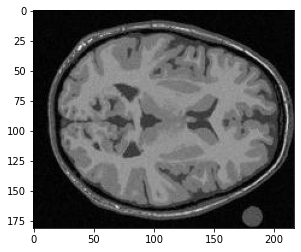

In [3]:
I = cv2.imread('subject05_80.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I,cmap='gray')

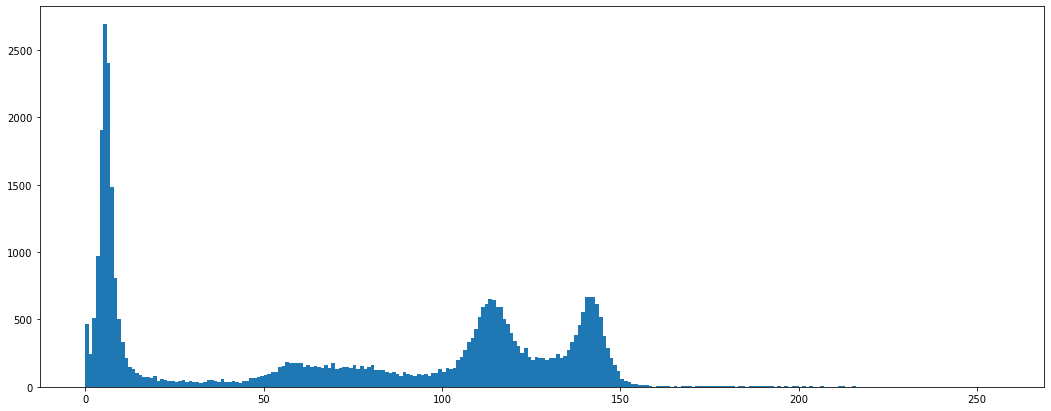

In [4]:
fig1=plt.figure(figsize = (18,7))
plt.hist(I.ravel(),256,[0,256]); 
plt.show()

In [5]:
nm=3 #number of models
phi=np.ones([nm,])/nm
med=random.sample(range(0, 255), nm) #initializing means randomly
med=np.linspace(30,150,nm)
devstd= np.ones([nm,])*5 #initializing standar desviation with 2
print(med,devstd)

[ 30.  90. 150.] [5. 5. 5.]


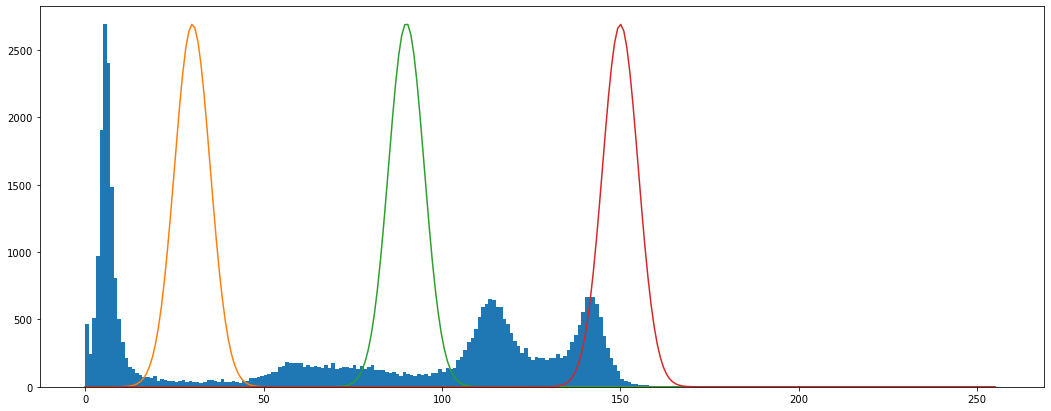

In [6]:
x=np.linspace(0,255,300)
hist, bin_edges=np.histogram(I.ravel(), bins=255)
fig1=plt.figure(figsize = (18,7))
b= plt.hist(I.ravel(),256,[0,256])
maxi=max(b[0])
for i in range(nm):
    pdf=normal_dist(x , med[i] , devstd[i])
    pdf=(pdf/max(pdf))*maxi
    plt.plot(x,pdf)
plt.show()

[0.41141742 0.33192123 0.25666135]
[0.38885619 0.41933195 0.19181186]
[0.36071028 0.56601315 0.07327657]
[0.33636067 0.6545022  0.00913714]
[2.74651111e-01 7.24892094e-01 4.56794617e-04]
[5.14588618e-02 9.48531493e-01 9.64488269e-06]
[7.39227692e-04 9.99260674e-01 9.84602167e-08]
[5.49806715e-06 9.99994501e-01 7.21639852e-10]
[2.86965579e-08 9.99999971e-01 4.08780137e-12]
[1.14077798e-10 1.00000000e+00 1.87209096e-14]


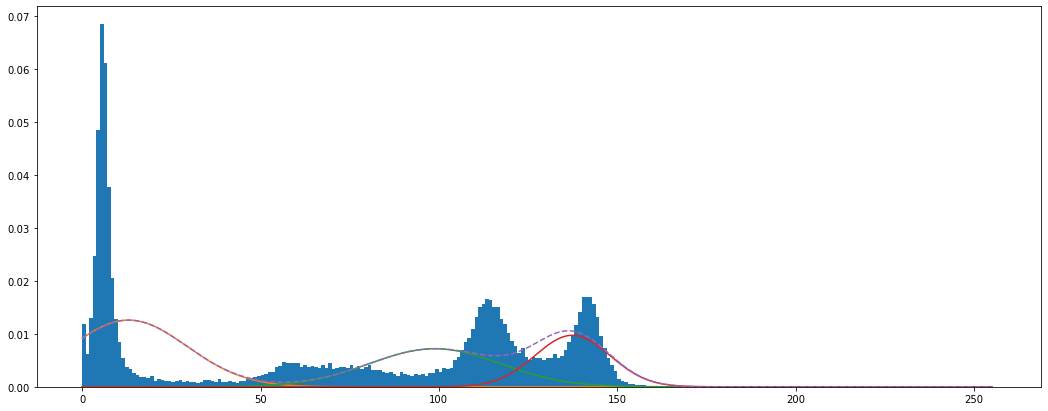

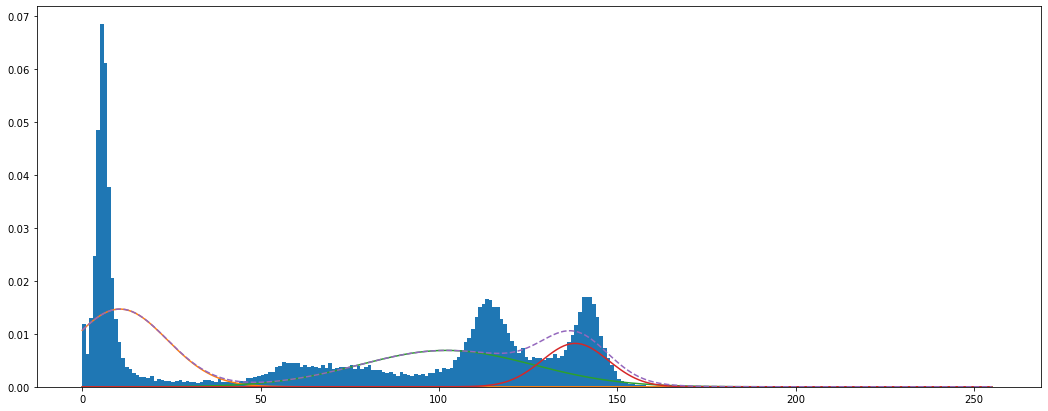

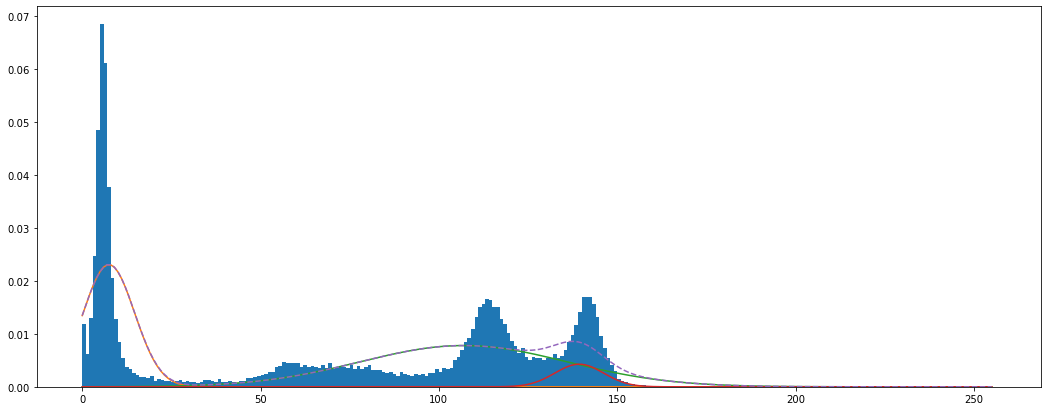

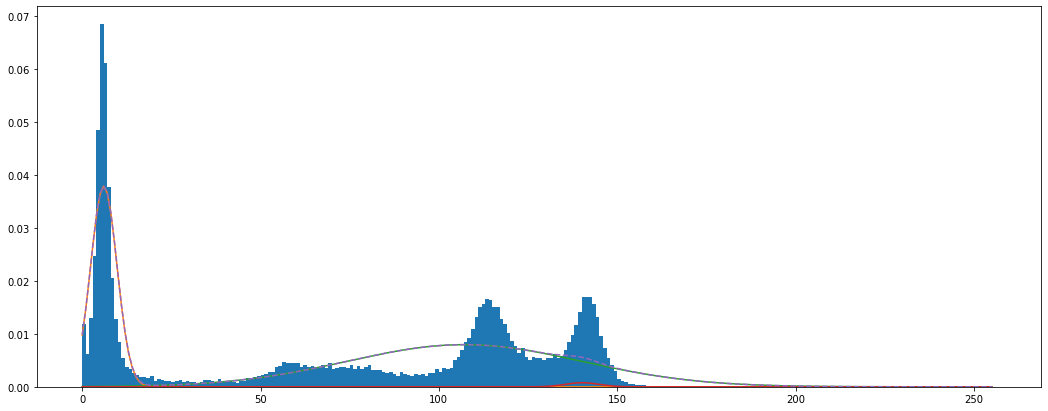

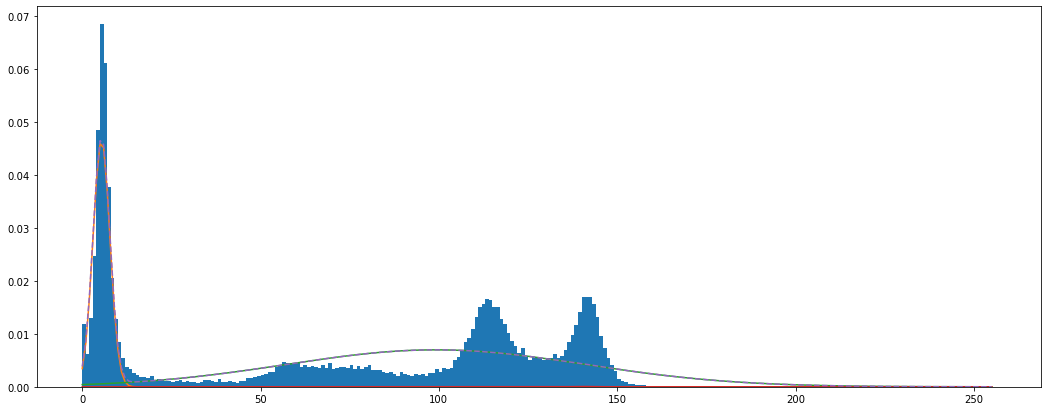

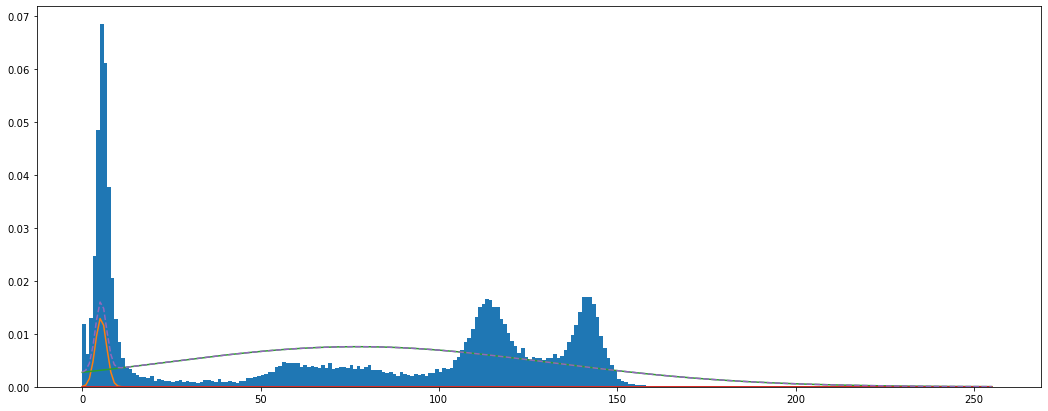

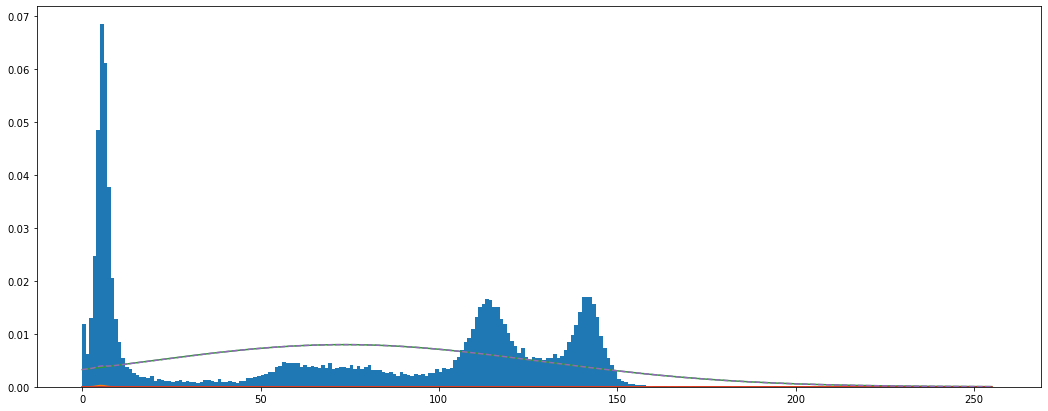

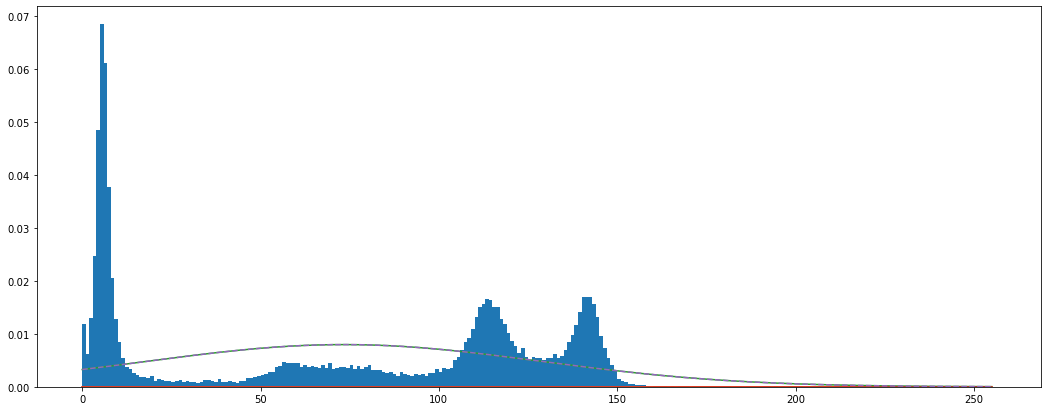

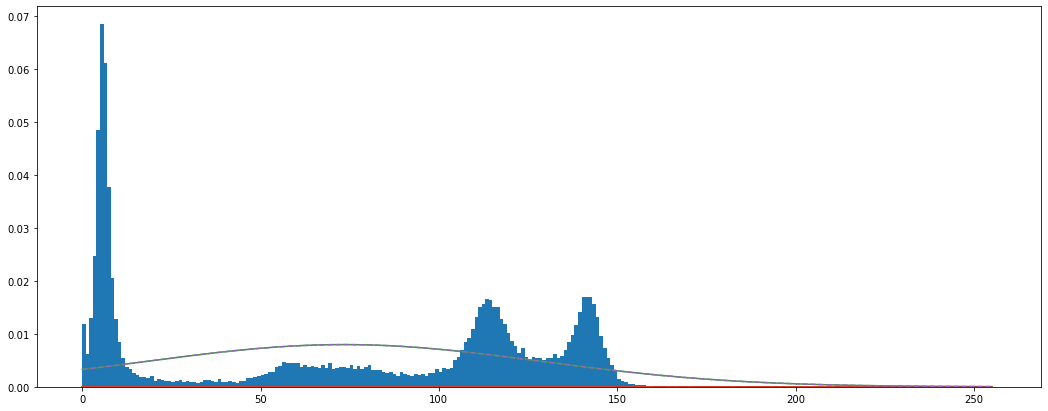

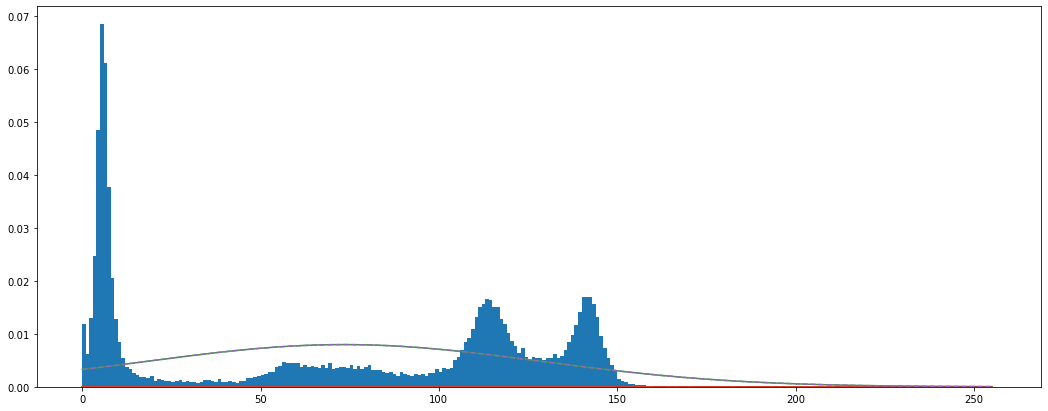

In [7]:
Ir=I.ravel()
Ir=Ir.astype(np.float)
lon=len(Ir)
pdf=np.zeros((nm,len(Ir)))
x=np.linspace(0,255,256)
for ite in range(10):
    gt=0;
    fig1=plt.figure(figsize = (18,7))
    plt.hist(I.ravel(),256,[0,256],density=True)
    for model in range(nm):
        pdf[model,:]=phi[model]*normal_dist(Ir , med[model] , devstd[model])
    pdft=np.sum(pdf,axis=0)
    gamma=pdf/pdft
    for model in range(nm):
        suma=np.sum(gamma[model,:])
        phi[model]=suma/lon
        med[model]=np.dot(gamma[model,:],Ir)/suma
        devstd[model]=np.sqrt(np.dot(gamma[model,:],(Ir-med[model])**2)/suma)
        f=normal_dist(x , med[model] , devstd[model]);
        f=f/np.sum(f)
        g=phi[model]*f
        gt=g+gt;
        plt.plot(x,g)
    plt.plot(x,gt,'--')
#     print(med)
    print(phi)
#    print(devstd)
#     Irt=np.argmin(pdf,axis=0)
#     for model in range(nm):
#         t=Irt==model
#         cont=[i for i, x in enumerate(t) if x]
#         med[model]=np.sum(Ir[cont])/(np.sum(t)+1e-13)
#         print(med)
#         print(np.sum(t))
    
# nf,nc=I.shape
# print(nf*nc)
# Irt=np.reshape(Irt, (nf, nc))   
# plt.imshow(Irt,cmap='jet')